# Efecto de la temperatura sobre la viscosidad de un fluido.

## Método.
- En un beaker de 400 mL colocar 300 mL de la sustancia prueba, la cual será asignada en el
laboratorio.
- Seleccionar la aguja más adecuada para realizar la medición de viscosidad.
- Medir la temperatura a la que se encuentre la sustancia prueba, y determinar su viscosidad
- Calentar la sustancia prueba para aumentar su temperatura unos cuantos grados centígrados y medir
nuevamente su viscosidad. Hacer medición de la viscosidad para al menos 5 niveles de temperatura
diferentes.

Partiendo de la ecuación para colerracionar datos de viscosidad de líquidos, se puede transformar a una forma lineal:

$$ \mu=Ae^{\frac{B}{T}} \therefore \ln(\mu)=\ln(A)+\frac{B}{T} \Rightarrow \ln(\mu)=T^{-1}B+\ln{A} $$

Que cumple con ser una ecuación de la recta donde el eje Y corresponde a $\ln(\mu)$, el eje X a $T^{-1}$, la pendiente a B y el intercepto con el eje Y a $\ln(A)$

[[0.00345841]
 [0.00341705]
 [0.00337667]
 [0.0033206 ]
 [0.00327708]
 [0.00323468]] [3.0301337  2.29253476 2.16044533 1.762159   1.46441214 1.25988044]

  R^2: 0.9483082411350288
  Pendiente(B): [7331.95955462]
  Intercepto(ln(A)): -22.54818117381898
  A: 1.612312938975342e-10



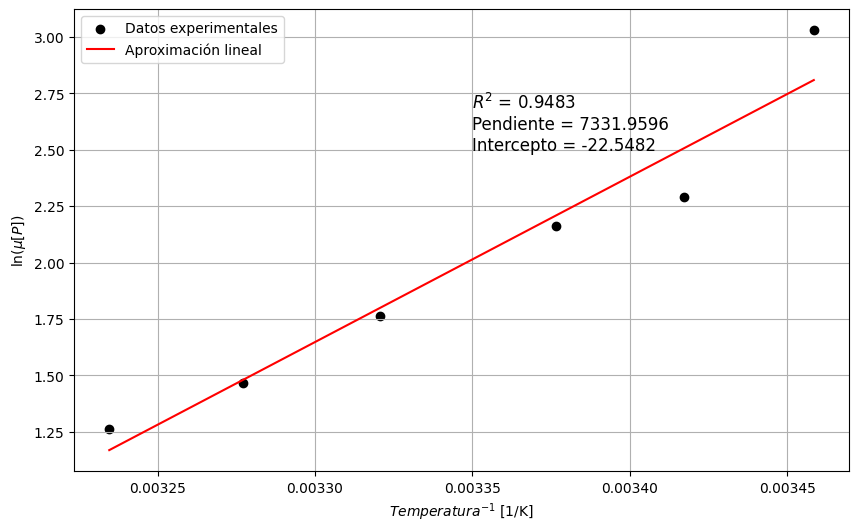

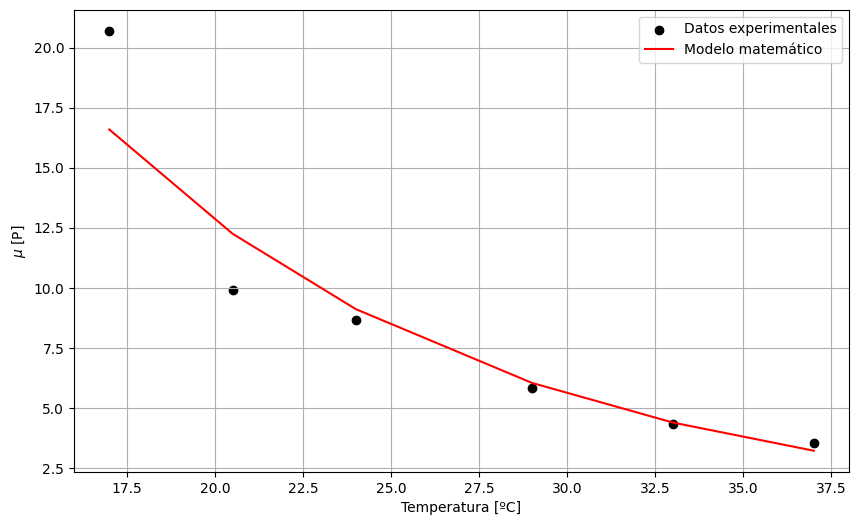

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = {
    'Viscosidad(cP)': [2070, 990, 867.5, 582.5, 432.5, 352.5],
    'Temperatura(C)': [17, 20.5, 24, 29, 33, 37]
        }

data['Viscosidad(P)'] = [visc / 100 for visc in data['Viscosidad(cP)'] ]
data['Temperatura(K)'] = [temp + 272.15 for temp in data['Temperatura(C)'] ]

x = np.array([1 / temp for temp in data['Temperatura(K)']]).reshape(-1,1)
y = np.array([np.log(visc) for visc in data['Viscosidad(P)']])

print(x,y)

model = LinearRegression()
model.fit(x,y)

A = np.e**model.intercept_
B = model.coef_

print(f'''
  R^2: {model.score(x,y)}
  Pendiente(B): {B}
  Intercepto(ln(A)): {model.intercept_}
  A: {A}
''')

rect = model.coef_*x + model.intercept_

plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Datos experimentales', color='black')
plt.plot(x, rect, label='Aproximación lineal', color='red')
plt.text(0.00335, 2.5, f'$R^2$ = {round(model.score(x,y), 4)}\nPendiente = {round(B[0],4)}\nIntercepto = {round(model.intercept_,4)}', fontsize=12)
plt.xlabel('$Temperatura^{-1}$ [1/K]')
plt.ylabel('$\ln(\mu[P])$')
plt.legend()
plt.grid()
plt.show()

math_model = A * np.e**(B/np.array(data['Temperatura(K)']))

plt.figure(figsize=(10,6))
plt.scatter(data['Temperatura(C)'], data['Viscosidad(P)'], label='Datos experimentales', color='black')
plt.plot(data['Temperatura(C)'], math_model, label='Modelo matemático', color='red')
plt.xlabel('Temperatura [ºC]')
plt.ylabel('$\mu$ [P]')
plt.legend()
plt.grid()
plt.show()


In [ ]:
dev = []
for i in range(0,6,1):
  dev.append(100 - (math_model[i] * 100 / data['Viscosidad(P)'][i]))

print(math_model)
print(dev)

[16.5893355  12.24967219  9.11030674  6.0397077   4.38949299  3.2166177 ]
[19.858282607854477, -23.734062552740795, -5.017945182026423, -3.6859691500382326, -1.4911674705562206, 8.748433920538389]
